In [64]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
%matplotlib inline

In [45]:
df=pd.read_csv('bank-full.csv')

In [46]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [48]:
#drop balance column as no info is provided regarding the same
df.drop(columns=['balance'],axis=1,inplace=True)

In [49]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [50]:
df.groupby(['Target']).count()
#there is a class imbalance problem.Probablity of correctly  Classifying the records belonging to Target class 'no' will be high.
#Also we can see there are  outliers in most of the attributes.


,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
Target,,,,,,,,,,,,,,,
no,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
yes,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


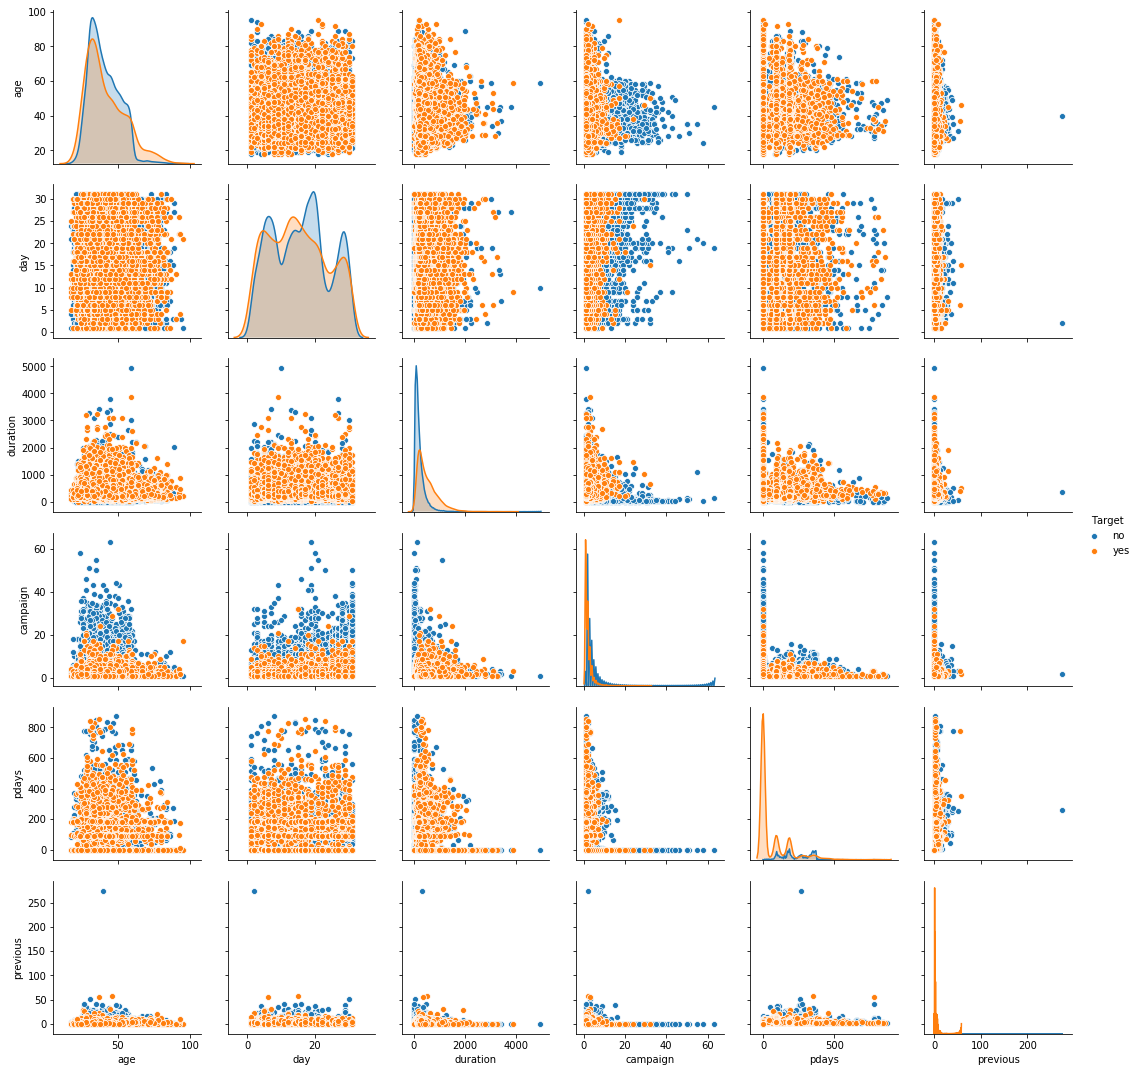

In [52]:
sns.pairplot(df,hue='Target')
# As we can see that there is exists no corelation between the continuous variables. Also distribution of  continuous variable is not normal

In [53]:
cor=df.corr()
print(cor)

               age       day  duration  campaign     pdays  previous
age       1.000000 -0.009120 -0.004648  0.004760 -0.023758  0.001288
day      -0.009120  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288 -0.051710  0.001203 -0.032855  0.454820  1.000000


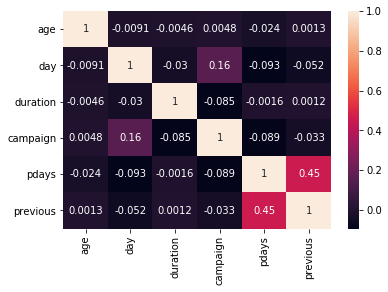

In [54]:
sns.heatmap(cor,annot=True)
# as we can see that there doesn't exists corelation between independent attributes

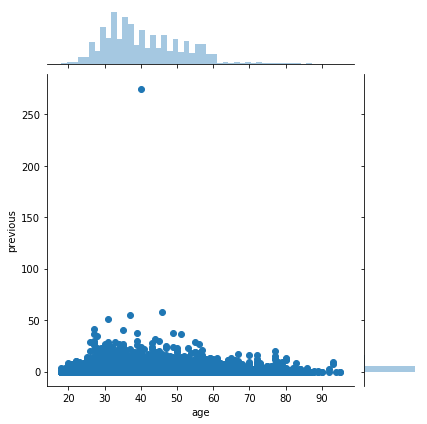

In [55]:
sns.jointplot('age','previous',data=df)

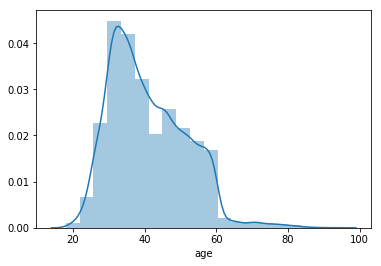

In [56]:
sns.distplot(df['age'],bins=20)

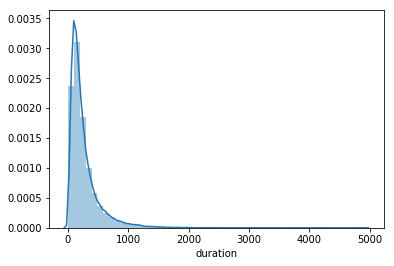

In [57]:
sns.distplot(df['duration'])

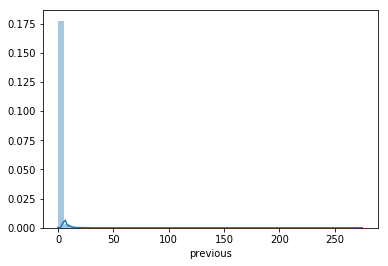

In [58]:
sns.distplot(df['previous'])

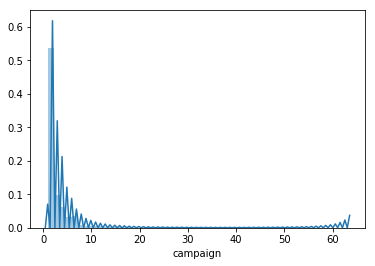

In [59]:
sns.distplot(df['campaign'])

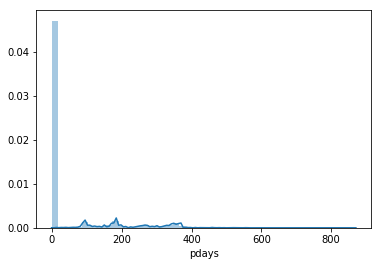

In [60]:
sns.distplot(df['pdays'])

In [61]:
# here shapiro test cannot be used to test normality of continuous attributes as number of samples are greates than 5000

In [65]:
df.head()

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [66]:
df.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'day', u'month', u'duration', u'campaign',
       u'pdays', u'previous', u'poutcome', u'Target'],
      dtype='object')

In [68]:
pd.pivot_table(data=df,index=['education','Target'],aggfunc='count')

age  campaign  contact    day  default  duration  housing  \
education Target                                                                
primary   no       6260      6260     6260   6260     6260      6260     6260   
          yes       591       591      591    591      591       591      591   
secondary no      20752     20752    20752  20752    20752     20752    20752   
          yes      2450      2450     2450   2450     2450      2450     2450   
tertiary  no      11305     11305    11305  11305    11305     11305    11305   
          yes      1996      1996     1996   1996     1996      1996     1996   
unknown   no       1605      1605     1605   1605     1605      1605     1605   
          yes       252       252      252    252      252       252      252   

                    job   loan  marital  month  pdays  poutcome  previous  
education Target                                                           
primary   no       6260   6260     6260   6260   6260      6260      6260  
          yes       591    591      591    591    591       591       591  
secondary no      20752  20752    20752  20752  20752     20752     20752  
          yes      2450   2450     2450   2450   2450      2450      2450  
tertiary  no      11305  11305    11305  11305  11305     11305     11305  
          yes      1996   1996     1996   1996   1996      1996      1996  
unknown   no       1605   1605     1605   1605   1605      1605      1605  
          yes       252    252      252    252    252       252       252

# DecisionTreeClassifier

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature]).codes # Replace strings with an integer

In [71]:
df.head()

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,0,0,2,5,8,198,1,-1,0,3,0


In [72]:
y=df['Target']
X=df.ix[:,0:-1]

/home/chetansrane/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [73]:
print(X.shape)
print(y.shape)

(45211, 15)
(45211,)


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [103]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

(13564,)

In [104]:
model_DT=DecisionTreeClassifier(criterion='entropy')

In [105]:
model_DT.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [107]:
model_DT.score(X_test,y_test)

0.8757741079327632

In [100]:
model_DT.score(X_train,y_train)

1.0

In [111]:
#If we don't regularize the model,then it leads to overfitting of DecisionTree model as seen from above
#let's check the test and train score by setting depth parameter
model_regularized=DecisionTreeClassifier(criterion='entropy',max_depth=10)
model_regularized.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [114]:
reg_pred=model_regularized.predict(X_test,y_test)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [112]:
model_regularized.score(X_test,y_test)

0.8926570333235034

In [113]:
model_regularized.score(X_train,y_train)

0.9226150977975796

In [83]:
#Hence after regularizing the model, we had generalized the model to population data

# RandomForestClassifier

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
for n in range(3,40):
    RF_model=RandomForestClassifier(n_estimators=n,max_depth=10)
    RF_model.fit(X_train, y_train)
    print("for {} estimator,the train score for model:{} and test score for model:{}".format(n,RF_model.score(X_train,y_train),RF_model.score(X_test,y_test)))
    

for 3 estimator,the train score for model:0.920908774923 and test score for model:0.897670303745
for 4 estimator,the train score for model:0.921161563497 and test score for model:0.897965202005
for 5 estimator,the train score for model:0.920971972067 and test score for model:0.900324388086
for 6 estimator,the train score for model:0.920624387778 and test score for model:0.899144795046
for 7 estimator,the train score for model:0.922583499226 and test score for model:0.898407549395
for 8 estimator,the train score for model:0.92482699782 and test score for model:0.900176938956
for 9 estimator,the train score for model:0.918444086327 and test score for model:0.897227956355
for 10 estimator,the train score for model:0.921698739217 and test score for model:0.898997345916
for 11 estimator,the train score for model:0.925774954972 and test score for model:0.901209082866
for 12 estimator,the train score for model:0.923910639239 and test score for model:0.899955765261
for 13 estimator,the train s

In [88]:
#As we can see from the above result, RandomForestClassifier avoied overfitting and gives some what better score than Decision Tree.
#Also test set accuracy tends to fluctuate between 89 and 90

# Gradient Boosting

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

In [90]:
for n in range(5,40):
    gbcl = GradientBoostingClassifier(n_estimators = n, learning_rate = 0.09, max_depth=10)
    gbcl.fit(X_train, y_train)
    print("for {} estimator,the train score for model:{} and test score for model:{}".format(n,gbcl.score(X_train,y_train),gbcl.score(X_test,y_test)))

for 5 estimator,the train score for model:0.883812051695 and test score for model:0.882409318785
for 6 estimator,the train score for model:0.894523967517 and test score for model:0.884399882041
for 7 estimator,the train score for model:0.903908743325 and test score for model:0.886832792687
for 8 estimator,the train score for model:0.913514709135 and test score for model:0.889044529637
for 9 estimator,the train score for model:0.923310266376 and test score for model:0.891551164848
for 10 estimator,the train score for model:0.930483142162 and test score for model:0.892509584193
for 11 estimator,the train score for model:0.935728505072 and test score for model:0.892951931584
for 12 estimator,the train score for model:0.940310297975 and test score for model:0.893984075494
for 13 estimator,the train score for model:0.94438651373 and test score for model:0.895089943969
for 14 estimator,the train score for model:0.947704363763 and test score for model:0.894721321144
for 15 estimator,the train

In [42]:
#As we can see from  the  above result, for GradientBoostingClassifier in this case, as estimators increases, train accuracy tends to overfit,but test accuracy fluctuates between 89 and 90|

In [43]:
#Hence to generalize the model, we can either do regularization  of Decision Tree or use RandomforestClassifier